In [2]:
import numpy as np 
import pandas as pad
import matplotlib.pyplot as plb
import seaborn as sns

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

from statsmodels.stats.outliers_influence import variance_inflation_factor

In [3]:
df = pad.read_csv('Salary_dataset.csv')
print(df.head())

   Unnamed: 0  YearsExperience   Salary
0           0              1.2  39344.0
1           1              1.4  46206.0
2           2              1.6  37732.0
3           3              2.1  43526.0
4           4              2.3  39892.0


In [4]:
#Check for null Columns
df.isnull().sum()

Unnamed: 0         0
YearsExperience    0
Salary             0
dtype: int64

In [5]:
#Summary Statistics
df.describe()

,Unnamed: 0,YearsExperience,Salary
count,30.000000,30.000000,30.000000
mean,14.500000,5.413333,76004.000000
std,8.803408,2.837888,27414.429785
min,0.000000,1.200000,37732.000000
25%,7.250000,3.300000,56721.750000
50%,14.500000,4.800000,65238.000000
75%,21.750000,7.800000,100545.750000
max,29.000000,10.600000,122392.000000


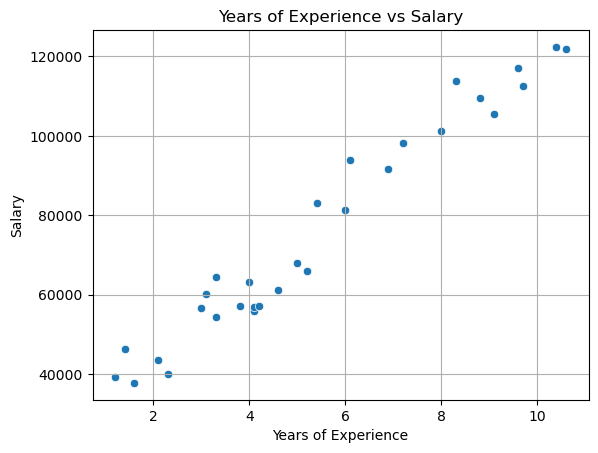

In [6]:
# Scatter plot of YearsExperience vs Salary
sns.scatterplot(data=df, x='YearsExperience', y='Salary')
plb.title("Years of Experience vs Salary")
plb.xlabel("Years of Experience")
plb.ylabel("Salary")
plb.grid(True)
plb.show()

In [7]:
#Correlation Matrix
print(df.corr())

                 Unnamed: 0  YearsExperience    Salary
Unnamed: 0         1.000000         0.986460  0.960826
YearsExperience    0.986460         1.000000  0.978242
Salary             0.960826         0.978242  1.000000


In [8]:
X = df[['YearsExperience']]
y = df['Salary']

In [9]:
# Split the data into training and testing sets (80% train, 20% test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [10]:
# Check Train Test Data Size
print('Train Size: ',len(X_train),'\t','Test Size: ',len(X_test))

Train Size:  24 	 Test Size:  6


In [11]:
# Create the model
model = LinearRegression()

#Train the model
model.fit(X_train, y_train)

LinearRegression()

In [12]:
# Intercept and coefficient
intercept = model.intercept_
slope = model.coef_[0]

print(f"Intercept (b0): {intercept}")
print(f"Slope (b1): {slope}")

Intercept (b0): 24380.201479473704
Slope (b1): 9423.815323030976


In [13]:
# Make predictions
y_pred = model.predict(X_test)

# Compare actual vs predicted
comparison = pad.DataFrame({'Actual': y_test, 'Predicted': y_pred})
print(comparison)

      Actual      Predicted
27  112636.0  115791.210113
15   67939.0   71499.278095
23  113813.0  102597.868661
17   83089.0   75268.804224
8    64446.0   55478.792045
9    57190.0   60190.699707


# Evaluate Model

In [15]:
# Error metrics
mae = mean_absolute_error(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"R-squared (R²): {r2}")

Mean Absolute Error (MAE): 6286.453830757745
Mean Squared Error (MSE): 49830096.855908394
Root Mean Squared Error (RMSE): 7059.04362190151
R-squared (R²): 0.9024461774180497


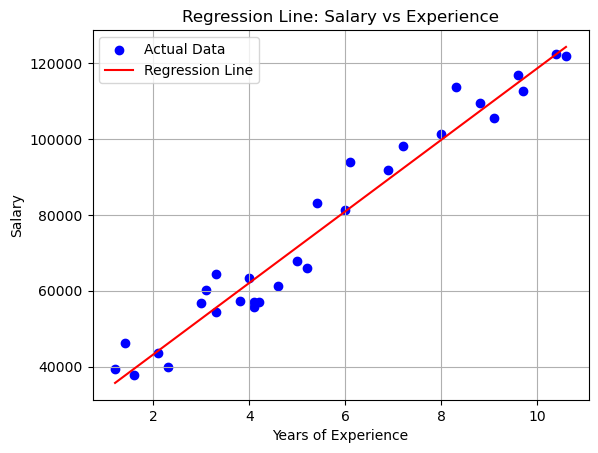

In [16]:
# Plot regression line with data
plb.scatter(X, y, color='blue', label='Actual Data')
plb.plot(X, model.predict(X), color='red', label='Regression Line')
plb.title('Regression Line: Salary vs Experience')
plb.xlabel('Years of Experience')
plb.ylabel('Salary')
plb.legend()
plb.grid(True)
plb.show()

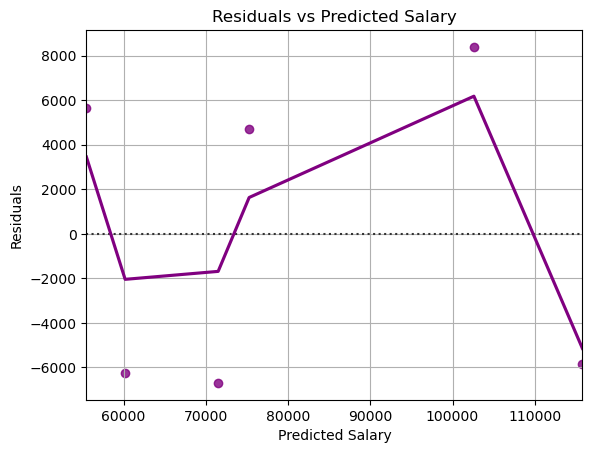

In [17]:
# Residuals
residuals = y_test - y_pred

# Plot residuals
sns.residplot(x=y_pred, y=residuals, lowess=True, color="purple")
plb.xlabel("Predicted Salary")
plb.ylabel("Residuals")
plb.title("Residuals vs Predicted Salary")
plb.grid(True)
plb.show()

# Regularisation

In [19]:
# Regularization of Linear Regression
# Assumptions of Linear Regression
# Lasso Regularization(L1)
# Tends to make the coefficient to absolute zero
# add the absolute value of magnitude of coefficient as penlaty term to loss function

from sklearn.linear_model import Lasso
las = Lasso()
las.fit(X_train, y_train)
y_pred_test = las.predict(X_test)
print(f"R2-score is: {r2_score(y_test, y_pred_test)}")

R2-score is: 0.9024455162895476


In [20]:
# Ridge Regression (L2)
# Add squared magnitude of coefficecitns as penalty term for the loss function
# Result never set the value of co-efficients to absolute zero

from sklearn.linear_model import Ridge
ridge = Ridge()
ridge.fit(X_train, y_train)
y_pred_test = ridge.predict(X_test)
print(f"R2-score is: {r2_score(y_test, y_pred_test)}")

R2-score is: 0.9021627846740264


In [21]:
# ElasticNet Regularization (L1+ L2)
# Add squared magnitude of coefficecitns as penalty term for the loss function
# Result never set the value of co-efficients to absolute zero

from sklearn.linear_model import ElasticNet
elasticnet = ElasticNet()
elasticnet.fit(X_train, y_train)
y_pred_test = elasticnet.predict(X_test)
print(f"R2-score is: {r2_score(y_test, y_pred_test)}")

R2-score is: 0.8962527621642433


# Assumptions of Linear Regression

In [23]:
#Linear releationshiop between feature and target
df.head(3)[['YearsExperience','Salary']]

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0


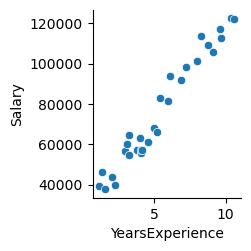

In [24]:
import seaborn as sns
sns.pairplot(df,x_vars=['YearsExperience'],y_vars=['Salary'])
plb.show()

In [25]:
#Pearson`s co-efficient
corr = df.corr()
corr

,Unnamed: 0,YearsExperience,Salary
Unnamed: 0,1.000000,0.986460,0.960826
YearsExperience,0.986460,1.000000,0.978242
Salary,0.960826,0.978242,1.000000


In [26]:
y_pred_test

array([113428.60616874,  71653.21546209, 100984.87276676,  75208.56786266,
        56542.96775969,  60987.1582604 ])

In [27]:
y_test

27    112636.0
15     67939.0
23    113813.0
17     83089.0
8      64446.0
9      57190.0
Name: Salary, dtype: float64

In [28]:
# mean residuals = 0

# Residuals
residual = (y_test - y_pred_test)
residual

27     -792.606169
15    -3714.215462
23    12828.127233
17     7880.432137
8      7903.032240
9     -3797.158260
Name: Salary, dtype: float64

In [29]:
np.mean(residual)

3384.601953276804

In [30]:
np.average(y_test)

83185.5

In [31]:
# Mean is around
result = np.mean(residual)/np.average(y_test)
result = np.round(result,2)*100
print(f"Mean is around: {result}% error")

Mean is around: 4.0% error


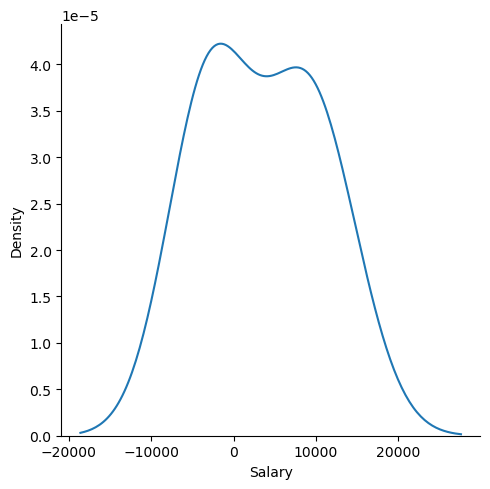

In [32]:
#Normal distribution of error terms
sns.displot(residual,kind="kde")
plb.show()

## No Multicolinearity

In [34]:
#Multi collinearity
#VIF Score

In [35]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [36]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# Step 1: Remove dependent variable (salary)
X = df.drop(columns=["salary"], errors="ignore")

# Step 2: Keep only numeric features
X = X.select_dtypes(include=["float64", "int64"])

# Step 3: Drop rows with NaN or inf (optional but recommended)
X = X.dropna()

# Step 4: Add constant
X_const = add_constant(X)

# Step 5: Calculate VIF
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_const.values, i)
    for i in range(X_const.shape[1])
]

print(vif_data)


           feature        VIF
0            const  25.350033
1       Unnamed: 0  37.747594
2  YearsExperience  67.362932
3           Salary  23.586798


In [37]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

# ---------------------------
# 1. Create a sample dataset
# ---------------------------
np.random.seed(42)
n = 100

X1 = np.random.rand(n) * 10
X2 = X1 * 0.8 + np.random.rand(n) * 2   # correlated with X1
X3 = np.random.rand(n) * 10
y = 3 + 2*X1 + 0.5*X2 + 1.5*X3 + np.random.randn(n) * 2

df = pd.DataFrame({"X1": X1, "X2": X2, "X3": X3, "y": y})
print(df[:5])

         X1        X2        X3          y
0  3.745401  3.059179  6.420316  21.742010
1  9.507143  8.878535  0.841400  26.412453
2  7.319939  6.484663  1.616287  27.594529
3  5.986585  5.806409  8.985542  32.622525
4  1.560186  3.063282  6.064291  12.698165


In [38]:
# ---------------------------
# 2. Train Linear Regression
# ---------------------------
X = df[["X1", "X2", "X3"]]
model = LinearRegression()
model.fit(X, df["y"])

print("Model Coefficients:", model.coef_)
print("Intercept:", model.intercept_)

# ---------------------------
# 3. Calculate VIF
# ---------------------------
X_const = add_constant(X)
vif_data = pd.DataFrame()
vif_data["feature"] = X_const.columns
vif_data["VIF"] = [
    variance_inflation_factor(X_const.values, i)
    for i in range(X_const.shape[1])
]
print("\nVariance Inflation Factors:")
print(vif_data)

Model Coefficients: [1.91634608 0.70854972 1.56586964]
Intercept: 2.1999442460555727

Variance Inflation Factors:
  feature        VIF
0   const  11.112919
1      X1  17.543227
2      X2  17.609993
3      X3   1.023792
